Naïm Mokrane Romain Oheix Lina El Jaouhari

Import the dataset, the librairies that we want and operate basic cleaning operations

In [1]:
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sea

df = pd.read_csv('sales.csv')

df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print(df.isnull().sum())

Order ID          0
Order Date        0
Order Year        0
Order Quarter     0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [5]:
print(df.duplicated().sum())

1


We find 11 missing values in the postal code column for the city "Burlington", we found it on Internet and we add it into the column

In [18]:
##df['Postal Code'].fillna('05401', inplace=True)

##print(df['Postal Code'].isnull().sum())

0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18396\1964640844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna('05401', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18396\1964640844.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Postal Code'].fillna('05401', inplace=True)


We also found that the postal code column is in float type so the previous code is not working since we're adding a string value, so we change the type of the column into string since a postal code is not a float number

In [7]:
df['Postal Code'] = df['Postal Code'].astype(str)
df['Postal Code'] = df['Postal Code'].replace('nan', '05401')
print(df['Postal Code'].isnull().sum())

0


Now our dataset is cleaned so we can start our analysis with the creation of the profit ratio column based on the sales and the profit

In [9]:
df['Profit Ratio'] = df['Profit'] / df['Sales']
df['Profit Ratio'].describe()
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Ratio
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


Once we have created our new variable, we were thinking about a first insight and we wanted to know which type of consummer are generating negative profit  

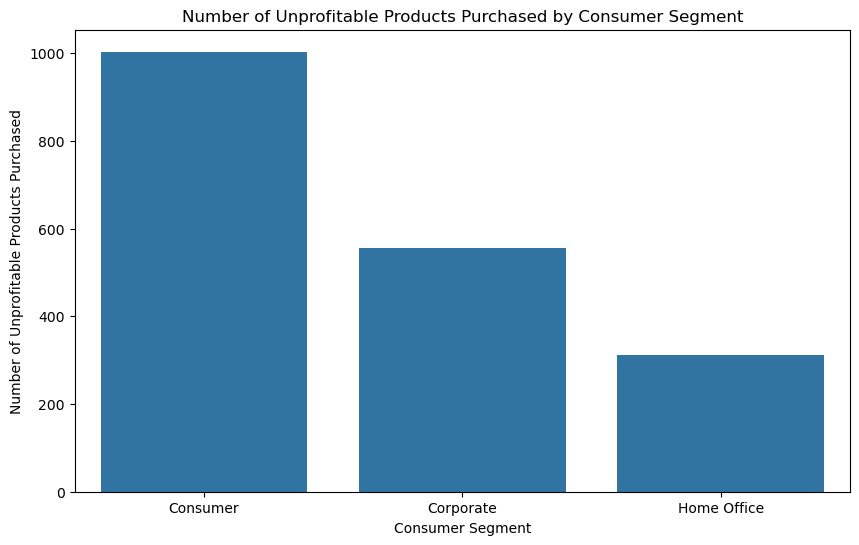

In [11]:
df['Profit Ratio'] = df['Profit'] / df['Sales']
unprofitable_products = df[df['Profit Ratio'] < 0]

consumer_segment_analysis = unprofitable_products.groupby('Segment')['Profit Ratio'].count()

mat.figure(figsize=(10,6))
sea.barplot(x=consumer_segment_analysis.index, y=consumer_segment_analysis.values)
mat.title('Number of Unprofitable Products Purchased by Consumer Segment')
mat.xlabel('Consumer Segment')
mat.ylabel('Number of Unprofitable Products Purchased')
mat.show()

Consumers are responsible for purchasing the largest number of unprofitable products, with over 1,000 such purchases. This suggests that the Consumer segment is contributing significantly to the losses.
The Corporate segment comes next, with fewer unprofitable purchases, but still significant, at around 550 purchases.
The Home Office segment is the smallest contributor, with around 300 unprofitable purchases

It may be worth investigating whether specific products or types of discounts offered to this segment are leading to the unprofitability.

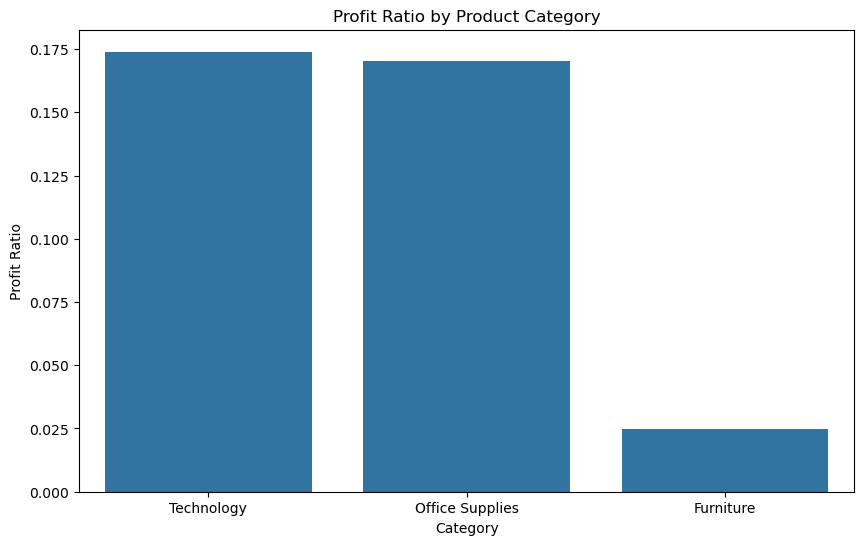

In [13]:
category_profit = df.groupby('Category')[['Profit', 'Sales']].sum()

category_profit['Profit Ratio'] = category_profit['Profit'] / category_profit['Sales']

category_profit = category_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(10,6))
sea.barplot(x=category_profit.index, y=category_profit['Profit Ratio'])
mat.title('Profit Ratio by Product Category')
mat.show()

The chart we generated shows a comparison of profit ratios across product categories. We can observe that the Technology and Office Supplies categories have high and similar profit ratios (around 0.17), indicating that they are the most profitable. However, the Furniture category has a much lower profit ratio, suggesting that it is the least profitable of the three.

Now, we will further investigate the Furniture category, which generates the lowest profit ratio, to identify the subcategories that are underperforming. This will help us determine which specific areas within Furniture are contributing to the lower profitability and could potentially be improved.

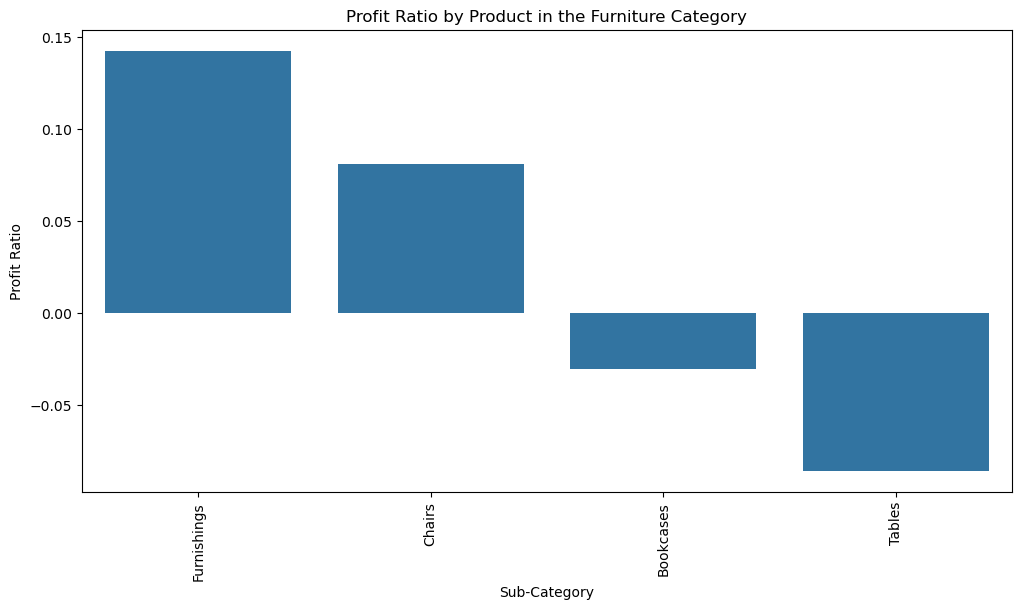

In [15]:
furniture_df = df[df['Category'] == 'Furniture']

furniture_product_profit = furniture_df.groupby('Sub-Category')[['Profit', 'Sales']].sum()

furniture_product_profit['Profit Ratio'] = furniture_product_profit['Profit'] / furniture_product_profit['Sales']

furniture_product_profit = furniture_product_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(12,6))
sea.barplot(x=furniture_product_profit.index, y=furniture_product_profit['Profit Ratio'])
mat.xticks(rotation=90)
mat.title('Profit Ratio by Product in the Furniture Category')
mat.show()


The Furnishings and Chairs sub-categories appear to be contributing positively to the overall profit of the Furniture category, but Bookcases and Tables are dragging down profitability. This suggests a need for a deeper investigation into these two sub-categories.

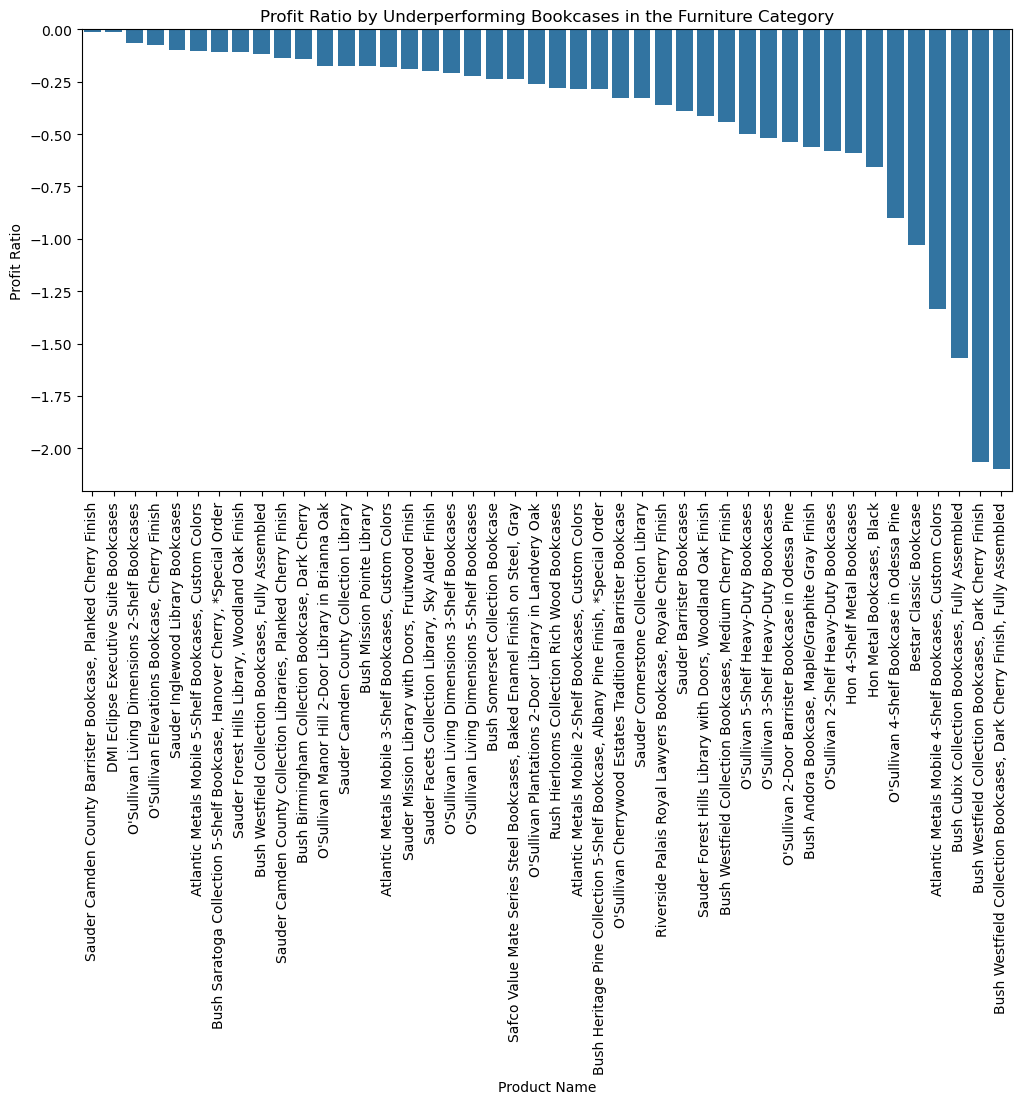

In [21]:
df['Profit Ratio'] = df['Profit'] / df['Sales']
tb_df = df[(df['Sub-Category'].isin(['Bookcases'])) & (df['Profit Ratio'] < 0)]

tb_profit = tb_df.groupby('Product Name')[['Profit', 'Sales']].sum()

tb_profit['Profit Ratio'] = tb_profit['Profit'] / tb_profit['Sales']

tb_profit = tb_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(12,6))
sea.barplot(x=tb_profit.index, y=tb_profit['Profit Ratio'])
mat.xticks(rotation=90)
mat.title('Profit Ratio by Underperforming Bookcases in the Furniture Category')
mat.show()

The Bookcases sub-category is heavily affected by underperforming products, especially certain models that generate substantial losses. This suggests a need for immediate action to mitigate these losses.

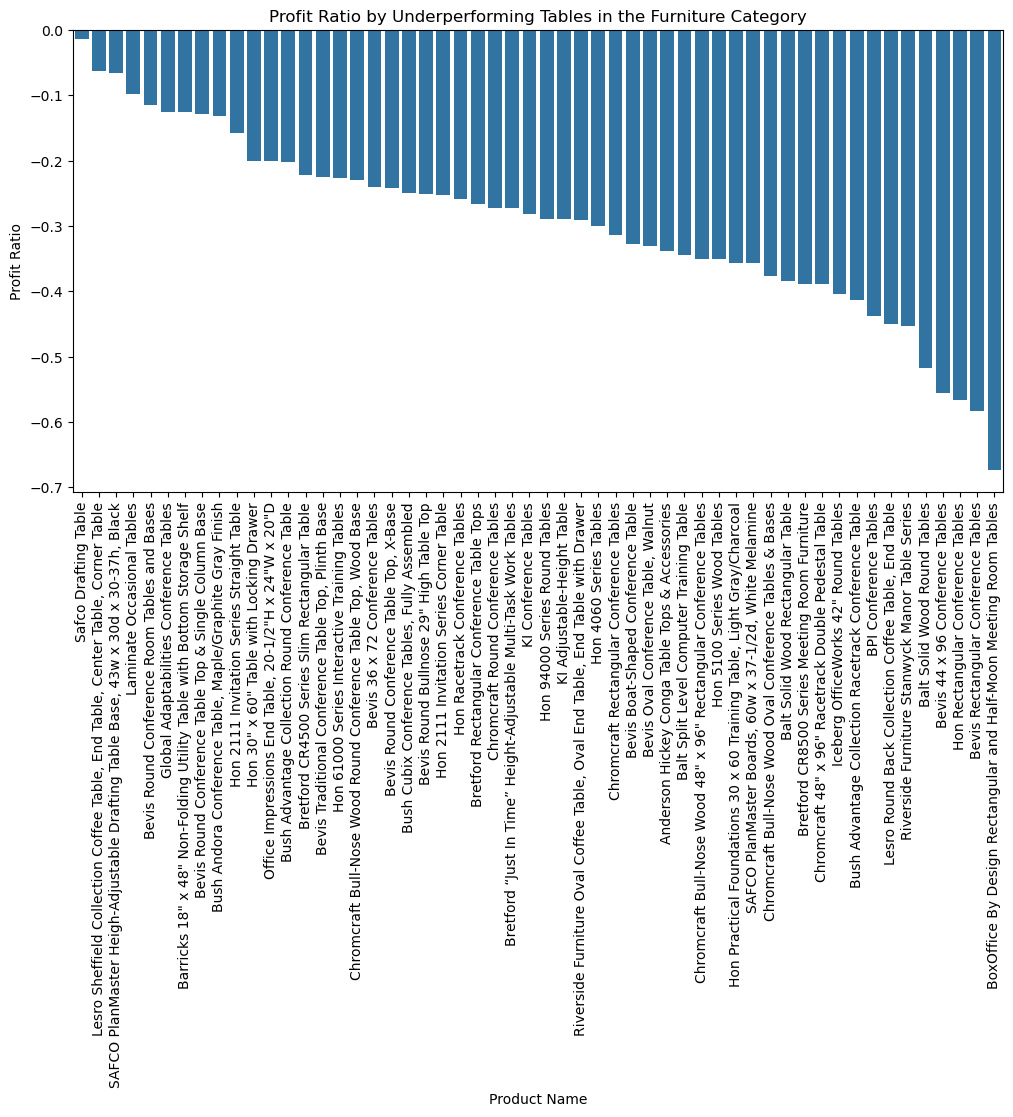

In [23]:
df['Profit Ratio'] = df['Profit'] / df['Sales']
tb_df = df[(df['Sub-Category'].isin(['Tables'])) & (df['Profit Ratio'] < 0)]

tb_profit = tb_df.groupby('Product Name')[['Profit', 'Sales']].sum()

tb_profit['Profit Ratio'] = tb_profit['Profit'] / tb_profit['Sales']

tb_profit = tb_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(12,6))
sea.barplot(x=tb_profit.index, y=tb_profit['Profit Ratio'])
mat.xticks(rotation=90)
mat.title('Profit Ratio by Underperforming Tables in the Furniture Category')
mat.show()

The Tables sub-category contains several products that are driving down overall profitability, especially the larger and more expensive conference and work tables.

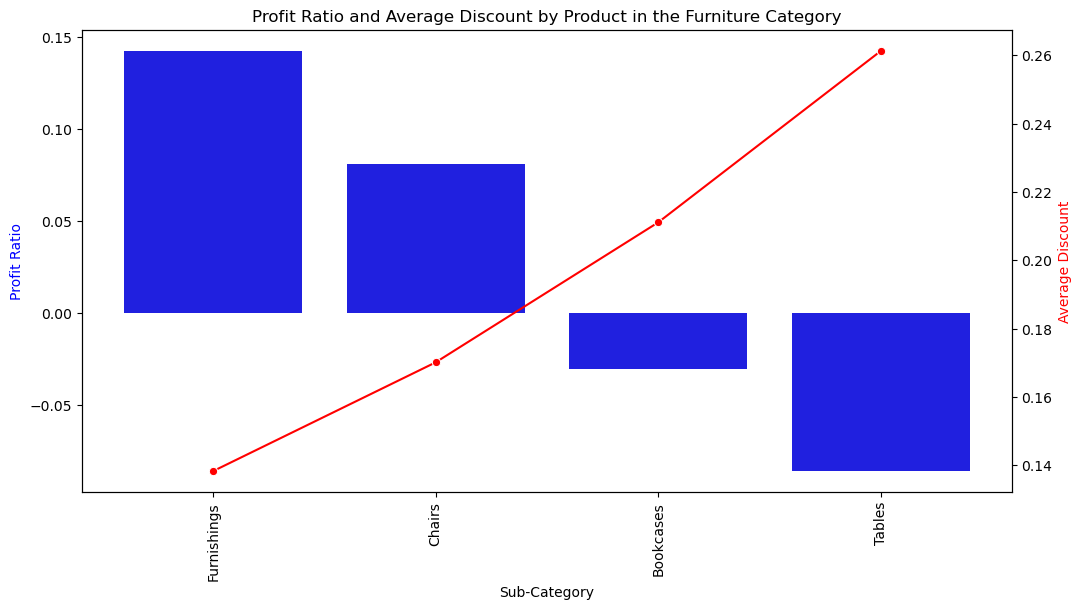

In [27]:
furniture_df = df[df['Category'] == 'Furniture']

furniture_product_profit = furniture_df.groupby('Sub-Category')[['Profit', 'Sales', 'Discount']].agg({'Profit': 'sum', 'Sales': 'sum', 'Discount': 'mean'})

furniture_product_profit['Profit Ratio'] = furniture_product_profit['Profit'] / furniture_product_profit['Sales']

furniture_product_profit = furniture_product_profit.sort_values(by='Profit Ratio', ascending=False)

fig, ax1 = mat.subplots(figsize=(12, 6))

sea.barplot(x=furniture_product_profit.index, y=furniture_product_profit['Profit Ratio'], ax=ax1, color='b')
ax1.set_ylabel('Profit Ratio', color='b')
mat.xticks(rotation=90)
mat.title('Profit Ratio and Average Discount by Product in the Furniture Category')

ax2 = ax1.twinx()
sea.lineplot(x=furniture_product_profit.index, y=furniture_product_profit['Discount'], ax=ax2, color='r', marker="o")
ax2.set_ylabel('Average Discount', color='r')

mat.show()



The chart highlights a relationship between discounting and profitability in the Furniture category. Products that receive higher discounts, such as Bookcases and Tables, tend to have lower or even negative profit ratios. On the other hand, products like Furnishings, which are less discounted, perform much better in terms of profitability.

This suggests that reducing discounts on underperforming products like Bookcases could potentially improve their profitability, while maintaining a controlled discount strategy on higher-performing items like Furnishings can help maximize profits.

We could also investigate the difference of profit between the states of the country to see if we can find some insights about the lack of profitability, so we are generating a map of the USA showing the profit per state

In [29]:
!pip install geopandas
import geopandas as gpd

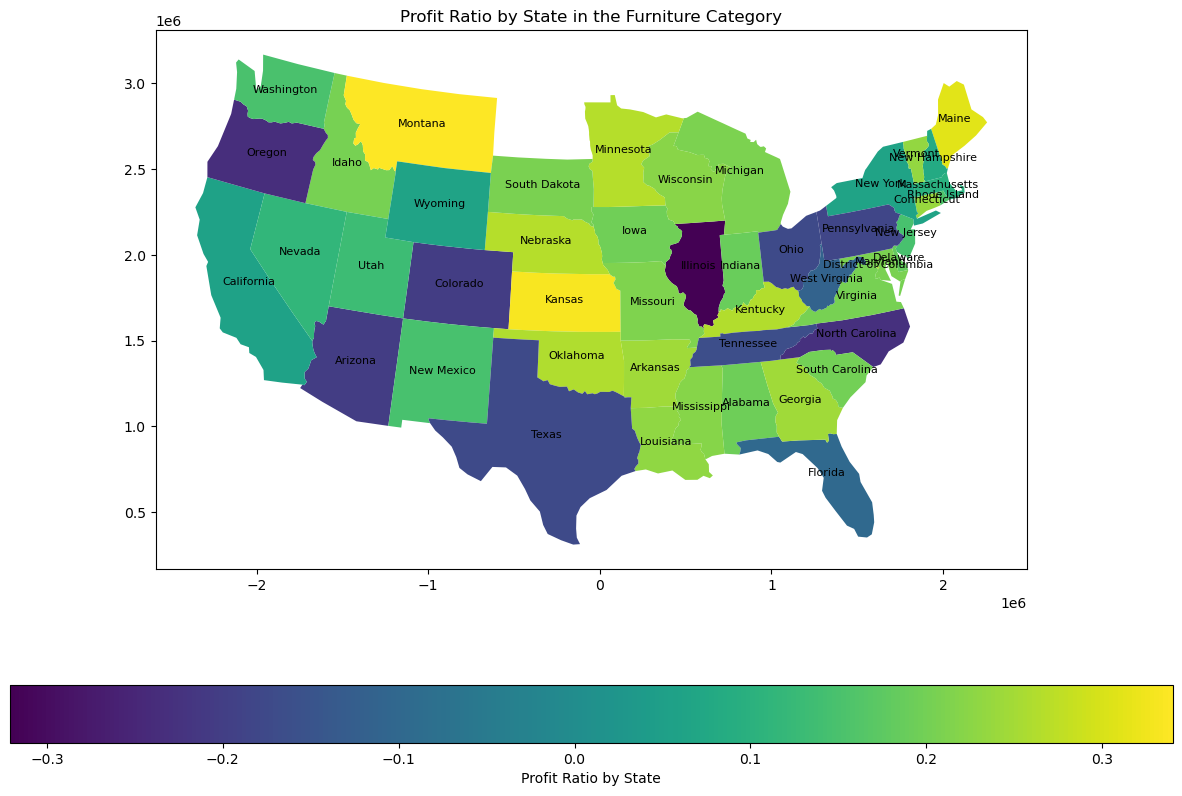

In [33]:
furniture_df = df[df['Category'] == 'Furniture']

state_profit = furniture_df.groupby('State')[['Profit', 'Sales']].sum()
state_profit['Profit Ratio'] = state_profit['Profit'] / state_profit['Sales']

usa = gpd.read_file(r'C:\Users\ADMIN\Desktop\MSc DSAI\UE 6 - Big Data Programming\Python for data science\Project\Carte\ne_110m_admin_1_states_provinces.shp')

merged = usa.set_index('name').join(state_profit['Profit Ratio'], how='right')

merged = merged.to_crs(epsg=5070)

fig, ax = mat.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Profit Ratio', ax=ax, legend=True,
            legend_kwds={'label': "Profit Ratio by State",
                         'orientation': "horizontal"},
            cmap='viridis')

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.text(x, y, label, fontsize=8, ha='center')

mat.title('Profit Ratio by State in the Furniture Category')
mat.show()

So we can see in our plot that we have a lot of states with negative profit ratio, specially the Illinois state so can focus on it to see some if we can find something, for example lets focus on the cities of this state to see if we have any differences

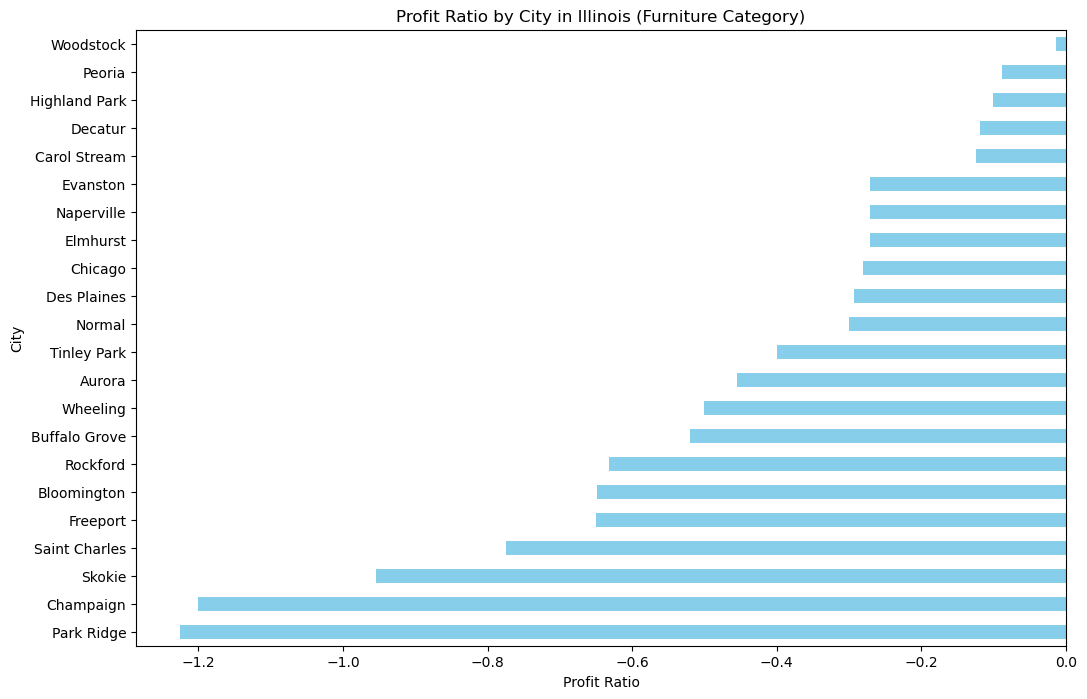

In [35]:
illinois_df = furniture_df[furniture_df['State'] == 'Illinois']


city_profit = illinois_df.groupby('City')[['Profit', 'Sales']].sum()
city_profit['Profit Ratio'] = city_profit['Profit'] / city_profit['Sales']


fig, ax = mat.subplots(figsize=(12, 8))
city_profit['Profit Ratio'].sort_values().plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Profit Ratio')
ax.set_title('Profit Ratio by City in Illinois (Furniture Category)')
mat.show()


So in conclusion we can see that every city of Illinois has a negative profitability but some cities are in a worst state than others so the company should aim in priority at cities like Park Ridge and Champagn which are below -1 of profit ratio. We can also focus these 2 cities like we did before

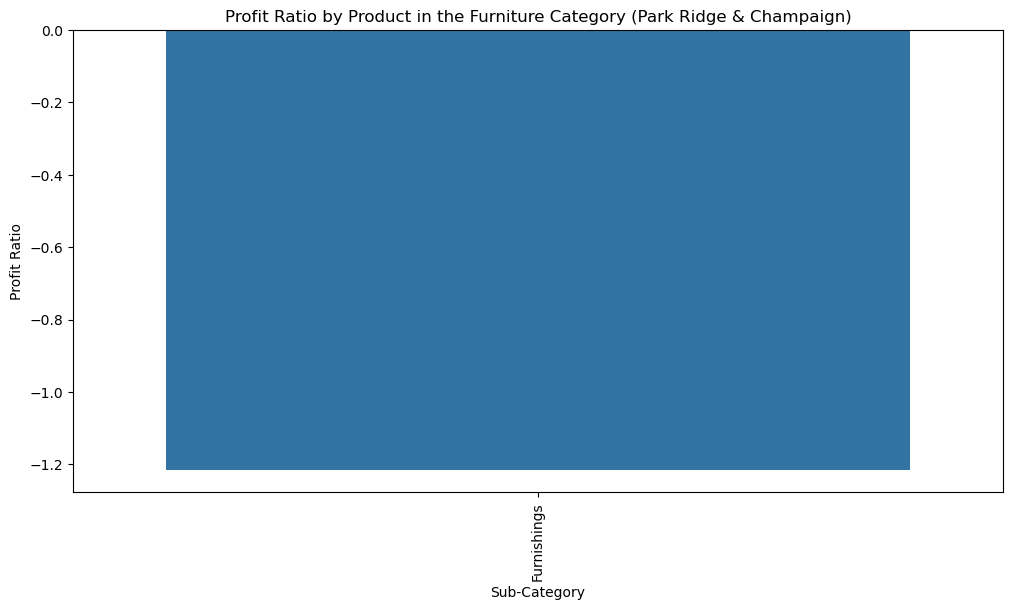

In [57]:
import matplotlib.pyplot as mat
import seaborn as sea

furniture_illinois_df = df[(df['Category'] == 'Furniture') & (df['City'].isin(['Park Ridge', 'Champaign']))]

furniture_product_profit = furniture_illinois_df.groupby('Sub-Category')[['Profit', 'Sales']].sum()

furniture_product_profit['Profit Ratio'] = furniture_product_profit['Profit'] / furniture_product_profit['Sales']

furniture_product_profit = furniture_product_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(12, 6))
sea.barplot(x=furniture_product_profit.index, y=furniture_product_profit['Profit Ratio'])
mat.xticks(rotation=90)
mat.title('Profit Ratio by Product in the Furniture Category (Park Ridge & Champaign)')
mat.xlabel('Sub-Category')
mat.ylabel('Profit Ratio')
mat.show()


We can see that people living in these 2 cities only buy furnishings stuff and the profitability for the company is negative so we can dig into this sub category to see if any products has negative impact. It's interesting because when we looked at the whole country furnishing was performing quite well but not for this 2 cities, that could mean that if we want to give very meaningful advices we should look at every city or at least every states so see the differences of buying habits.

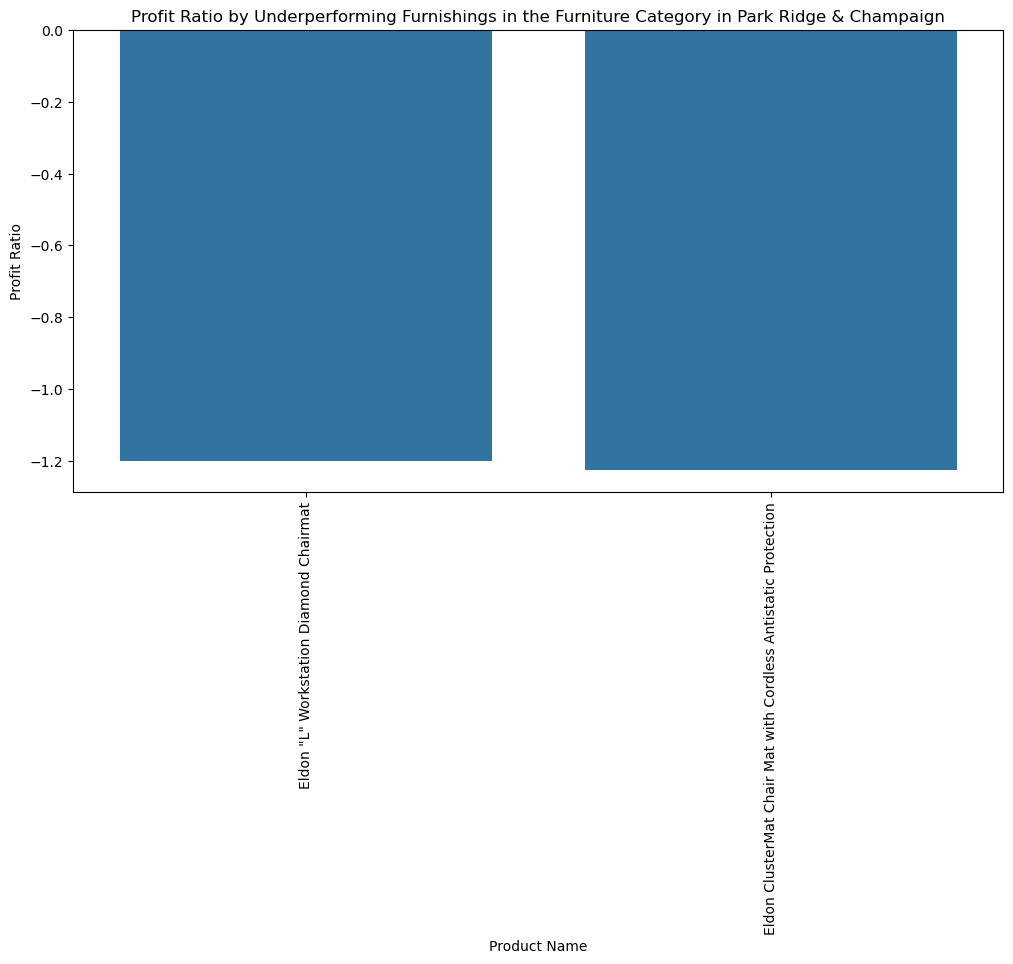

In [63]:
df['Profit Ratio'] = df['Profit'] / df['Sales']

furnishing_illinois_df = df[(df['Sub-Category'] == 'Furnishings') & 
                            
                            (df['City'].isin(['Park Ridge', 'Champaign']))]

f_i_profit = furnishing_illinois_df.groupby('Product Name')[['Profit', 'Sales']].sum()

f_i_profit['Profit Ratio'] = f_i_profit['Profit'] / f_i_profit['Sales']

f_i_profit = f_i_profit.sort_values(by='Profit Ratio', ascending=False)

mat.figure(figsize=(12, 6))
sea.barplot(x=f_i_profit.index, y=f_i_profit['Profit Ratio'])
mat.xticks(rotation=90)
mat.title('Profit Ratio by Underperforming Furnishings in the Furniture Category in Park Ridge & Champaign')
mat.xlabel('Product Name')
mat.ylabel('Profit Ratio')
mat.show()


People in this city are only buying 2 products and these 2 are not profitable so we can advice the company to take an eye into it to see if they can improve or change it with others prodcuts